In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
# Read in csv
data = pd.read_csv('Resources/lending_data.csv')
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Split up features from labels
y = data['loan_status'].values
X = data.drop(columns='loan_status')

In [4]:
# Inspect target variable and check balance of data
print(data['loan_status'].value_counts())

# Generate list of colors based on loan status
color_list = []
size_list = []

for status in list(data['loan_status']):
    if status == 0:
        color_list.append('#DA254F')
        size_list.append(40)
    else:
        color_list.append('#25DAB0')
        size_list.append(15)

0    75036
1     2500
Name: loan_status, dtype: int64


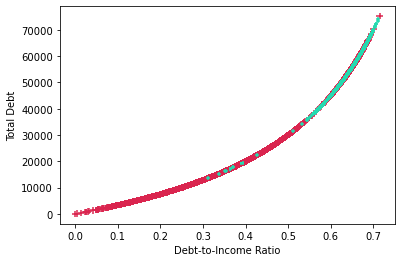

In [5]:
# Explore data
import matplotlib.pyplot as plt

plt.scatter(data['debt_to_income'],data['total_debt'],c=color_list,s=size_list,marker='+');
plt.xlabel('Debt-to-Income Ratio');
plt.ylabel('Total Debt');

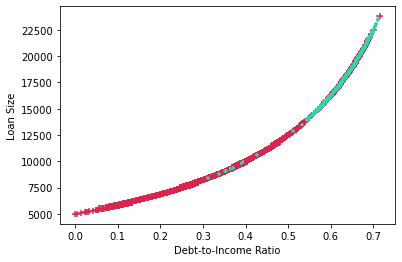

In [6]:
plt.scatter(data['debt_to_income'],data['loan_size'],c=color_list,s=size_list,marker='+');
plt.xlabel('Debt-to-Income Ratio');
plt.ylabel('Loan Size');

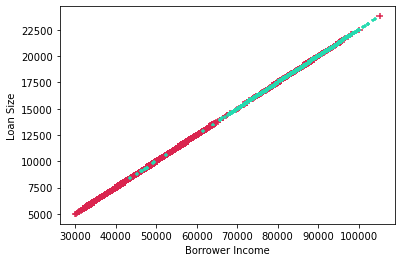

In [7]:
plt.scatter(data['borrower_income'],data['loan_size'],c=color_list,s=size_list,marker='+');
plt.xlabel('Borrower Income');
plt.ylabel('Loan Size');

### Considering the Models
We will implement two models to predict whether or not a loan will be approved: a logistic regression model and a random forest classfier model. Since the data is relatively simple with only 7 numerical features, and the data labels are highly imbalanced with the vast majority of loans not having been approved (~97%), it is likely that our two models will perform comparably. However, as evidenced by the above scatterplots, the data is not linearly separable (i.e., we can not draw a line to separate the set of points representing loans that were approved and loans that were not approved) and so the data is better suited to a random forest classfier model.

In [8]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
29175,8600.0,6.792,44500,0.325843,3,0,14500
23020,7800.0,6.419,41000,0.268293,2,0,11000
31269,10000.0,7.386,50100,0.401198,4,1,20100
35479,9300.0,7.093,47300,0.365751,3,0,17300
13470,9200.0,7.045,46900,0.360341,3,0,16900


In [9]:
# Scale the train and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train a Logistic Regression model print the model score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f'Logistic train score: {round(classifier.score(X_train_scaled,y_train),4)}')
print(f'Logistic test score: {round(classifier.score(X_test_scaled,y_test),4)}')

Logistic train score: 0.9943
Logistic test score: 0.9937


In [11]:
# Show 40 predictions versus test labels
y_pred = classifier.predict(X_test_scaled)
print(f'Actual:\t\t {y_test[0:40]}')
print(f'Predict:\t {y_pred[0:40]}')

Actual:		 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0]
Predict:	 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0]


In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_scaled,y_train)
print('Random forest train score:\t' + 
      str(round(random_forest_classifier.score(X_train_scaled,y_train),4)))
print('Random forest test score:\t' +
      str(round(random_forest_classifier.score(X_test_scaled,y_test),4)))

Random forest train score:	0.9975
Random forest test score:	0.9917


In [13]:
# Show 40 predictions versus test labels
y_pred_random_forest = random_forest_classifier.predict(X_test_scaled)
print(f'Actual:\t\t {y_test[0:40]}')
print(f'Predict:\t {y_pred[0:40]}')

Actual:		 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0]
Predict:	 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0]


### Conclusion
The random forest classifier model generated a higher test score than the logistic regression model (.9915 versus .9937), in accordance with our predictions. However, it merits keeping in mind that the test and training data was highly imbalanced, with only approximately 3% of the loans receiving approval in our dataset. In other words, if we had a model that predicted that no loans would be approved, then it would still predict the correct label 97% of the time. 